In [2]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [1]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    return (b - a) * f(a)

def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    return (b - a) * f((a + b) / 2)

def I_trapezoid(f, a, b):
    """ Newton-Cotes Trapezoidal rule"""
    return (b - a) / 2 * (f(a) + f(b))

def I_simpson(f, a, b):
    """ Newton-Cotes Simpson's rule"""
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))

In [3]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

The 3-point Gauss-Legendre quadrature rule is given by:
$$
I[f] \approx \sum_{i=1}^3 w_i f(x_i)
$$
where:
- $ x_i $ are the roots of the Legendre polynomial $ P_3(x) = \frac{5x^3 - 3x}{2} $, which is of degree 3.
- $ w_i $ are weights that we will determine using the method of undetermined coefficients by requiring that the quadrature rule exactly integrates the monomials $ 1 $, $ x $, and $ x^2 $ over the interval $ x \in [-1, 1] $.

### Step 1: Find the Quadrature Points $ x_i $

The quadrature points are the roots of $ P_3(x) = \frac{5x^3 - 3x}{2} $.

1. Set $ P_3(x) = 0 $:
   $$
   \frac{5x^3 - 3x}{2} = 0
   $$
   $$
   \Rightarrow x(5x^2 - 3) = 0
   $$

2. Solving this equation gives us:
   - $ x = 0 $,
   - $ x = \pm \sqrt{\frac{3}{5}} $.

Thus, the quadrature points are:
$$
x_1 = -\sqrt{\frac{3}{5}}, \quad x_2 = 0, \quad x_3 = \sqrt{\frac{3}{5}}
$$

### Step 2: Set Up Equations to Determine the Weights $ w_i $

We now use the **method of undetermined coefficients** to find $ w_i $ by requiring that the quadrature rule integrates the monomials $1$, $x$, and $x^2$ exactly.

### Requirement 1: Integrate $ f(x) = 1 $

The integral of $ f(x) = 1 $ over $[-1, 1]$ is:
$$
\int_{-1}^1 1 \, dx = 2
$$
Using the quadrature rule, we get:
$$
w_1 + w_2 + w_3 = 2
$$

### Requirement 2: Integrate $ f(x) = x $

The integral of $ f(x) = x $ over $[-1, 1]$ is zero, as $x$ is an odd function:
$$
\int_{-1}^1 x \, dx = 0
$$
Using the quadrature rule, we get:
$$
w_1 x_1 + w_2 x_2 + w_3 x_3 = 0
$$
Since $x_1 = -x_3$ and $x_2 = 0$, this equation is **automatically satisfied**.

### Requirement 3: Integrate $ f(x) = x^2 $

The integral of $ f(x) = x^2 $ over $[-1, 1]$ is:
$$
\int_{-1}^1 x^2 \, dx = \frac{2}{3}
$$
Using the quadrature rule, this gives:
$$
w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2 = \frac{2}{3}
$$

Since $x_2 = 0$, we have $x_2^2 = 0$, so this simplifies to:
$$
w_1 x_1^2 + w_3 x_3^2 = \frac{2}{3}
$$

### Solving for $ w_1 $, $ w_2 $, and $ w_3 $

Since $x_1$ and $x_3$ are $\pm \sqrt{\frac{3}{5}}$, we find that:
$$
x_1^2 = x_3^2 = \frac{3}{5}
$$

Substituting into the equation, we get:
$$
w_1 \frac{3}{5} + w_3 \frac{3}{5} = \frac{2}{3}
$$
or
$$
\frac{3}{5}(w_1 + w_3) = \frac{2}{3}
$$

Dividing both sides by $\frac{3}{5}$, we obtain:
$$
w_1 + w_3 = \frac{2}{3} \cdot \frac{5}{3} = \frac{10}{9}
$$

This gives us two equations:
1. $ w_1 + w_2 + w_3 = 2 $
2. $ w_1 + w_3 = \frac{10}{9} $

Solving these equations:
- From (2), we know $ w_1 + w_3 = \frac{10}{9} $.
- Subtracting equation (2) from equation (1) gives:
  $$
  w_2 = 2 - \frac{10}{9} = \frac{8}{9}
  $$

Thus, we have:
$$
w_2 = \frac{8}{9}
$$

Substituting $w_2$ into $w_1 + w_3 = \frac{10}{9}$, we find:
$$
w_1 = w_3 = \frac{5}{9}
$$

### Final Weights

The weights for the 3-point Gauss-Legendre quadrature rule are:
$$
w_1 = \frac{5}{9}, \quad w_2 = \frac{8}{9}, \quad w_3 = \frac{5}{9}
$$

### Verification

The weights and points satisfy all requirements:
- **Integrates $1$**: $ w_1 + w_2 + w_3 = 2 $.
- **Integrates $x$**: Automatically satisfied.
- **Integrates $x^2$**: $ w_1 x_1^2 + w_3 x_3^2 = \frac{2}{3} $.

Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [4]:
def I_GL3(f, a, b):
    """ 
    3-point Gauss-Legendre Quadrature rule for an arbitrary interval x ∈ [a, b]
    
    Parameters:
    -----------
    f : function
        The function to integrate.
    a : float
        Left endpoint of the interval.
    b : float
        Right endpoint of the interval.
    
    Returns:
    --------
    float
        Approximation of the integral ∫[a,b] f(x) dx using 3-point Gauss-Legendre quadrature.
    """
    # Quadrature points and weights for the interval [-1, 1]
    points = numpy.array([-numpy.sqrt(3/5), 0, numpy.sqrt(3/5)])
    weights = numpy.array([5/9, 8/9, 5/9])
    
    # Transform points from [-1, 1] to [a, b]
    transformed_points = 0.5 * (b - a) * points + 0.5 * (a + b)
    
    # Compute the integral approximation
    integral = 0.5 * (b - a) * numpy.sum(weights * f(transformed_points))
    
    return integral


In [5]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [6]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    Integrate a function f over the interval x in [a, b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (b - a)/N 
        
    Parameters:
    -----------
    f: function
        Function f(x) to be integrated (returns float)
    a: float
        Left boundary of interval
    b: float
        Right boundary of interval
    N: int
        Number of panels to subdivide [a, b]
    method: function
        Quadrature function with interface I(f, x0, x1) (returns real)
        This function approximates the integral over a subinterval [x0, x1]
        Defaults to midpoint rule
            
    Returns:
    --------
    I_N: float
        Extended quadrature approximation of \int_a^b f(x) dx
    """
    # Calculate panel width
    dx = (b - a) / N
    
    # Initialize the total integral
    I_N = 0.0
    
    # Loop over each panel and apply the quadrature method
    for i in range(N):
        # Define the endpoints of the current subinterval
        x0 = a + i * dx
        x1 = x0 + dx
        
        # Apply the quadrature method on the current panel and accumulate
        I_N += method(f, x0, x1)
    
    return I_N


In [7]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to 
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for 
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


* the calculated rate of convergence of each  scheme. 

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit. 

In [10]:
# Define quadrature methods list
quadrature_methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]

def plot_quad_convergence(f, a, b, N_list, I_true, title=None):
    """ 
    Create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx.
    
    Also calculates the best fit straight line in log-log space to estimate convergence
    parameters for each method.
    
    Parameters:
    -----------
    f: function
        Function f(x) to integrate
    a: float
        Left boundary of interval
    b: float
        Right boundary of interval
    N_list: List of integers
        Number of panels to subdivide [a, b] for each trial
    I_true: float
        True solution to compute errors
    title: str
        Title of plot (if not None)
            
    Returns:
    --------
    None, but generates a log-log plot
    """
    plt.figure(figsize=(10, 6))
    
    for method in quadrature_methods:
        errors = []
        dx_values = []
        
        # Loop over each N in N_list
        for N in N_list:
            I_approx = quadN(f, a, b, N, method=method)
            error = abs(I_approx - I_true) / abs(I_true)
            dx = (b - a) / N
            
            errors.append(error)
            dx_values.append(dx)
        
        # Convert lists to arrays for plotting
        errors = numpy.array(errors)
        dx_values = numpy.array(dx_values)
        
        # Calculate convergence rate (slope in log-log space)
        fit = numpy.polyfit(numpy.log(dx_values), numpy.log(errors), 1)
        p = fit[0]  # Convergence rate (slope)
        
        # Plot errors and best fit line
        plt.loglog(dx_values, errors, 'o-', label=f'{method.__name__} (p ≈ {p:.2f})')
        plt.loglog(dx_values, numpy.exp(fit[1]) * dx_values**fit[0], '--')
    
    # Plot configuration
    plt.xlabel(r'$\Delta x$ (Panel Spacing)')
    plt.ylabel('Relative Error')
    if title:
        plt.title(title)
    else:
        plt.title("Convergence of Quadrature Methods")
    plt.legend()
    plt.grid(True, which="both", linestyle="--")
    plt.show()


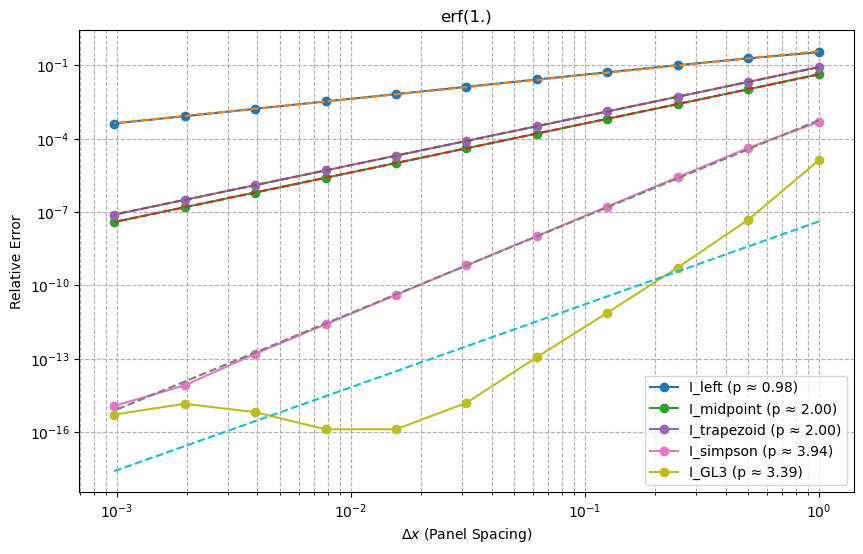

In [11]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


YOUR ANSWER HERE

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

YOUR ANSWER HERE

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [ ]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(c)**  [4] Explain the results of your plots

YOUR ANSWER HERE

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE